In [70]:
customer_data=read.csv("D:/R Lab/Customer Segmentation/CustomerSegmentation-master/data/Mall_Customers.csv")

In [71]:
str(customer_data)
names(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [72]:
head(customer_data)

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [73]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [74]:
sd(customer_data$Age)

[1] 13.96901

In [75]:
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

In [76]:
sd(customer_data$Annual.Income..k..)

[1] 26.26472

In [77]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [78]:
sd(customer_data$Spending.Score..1.100.)

[1] 25.82352

In [79]:
a=table(customer_data$Gender)

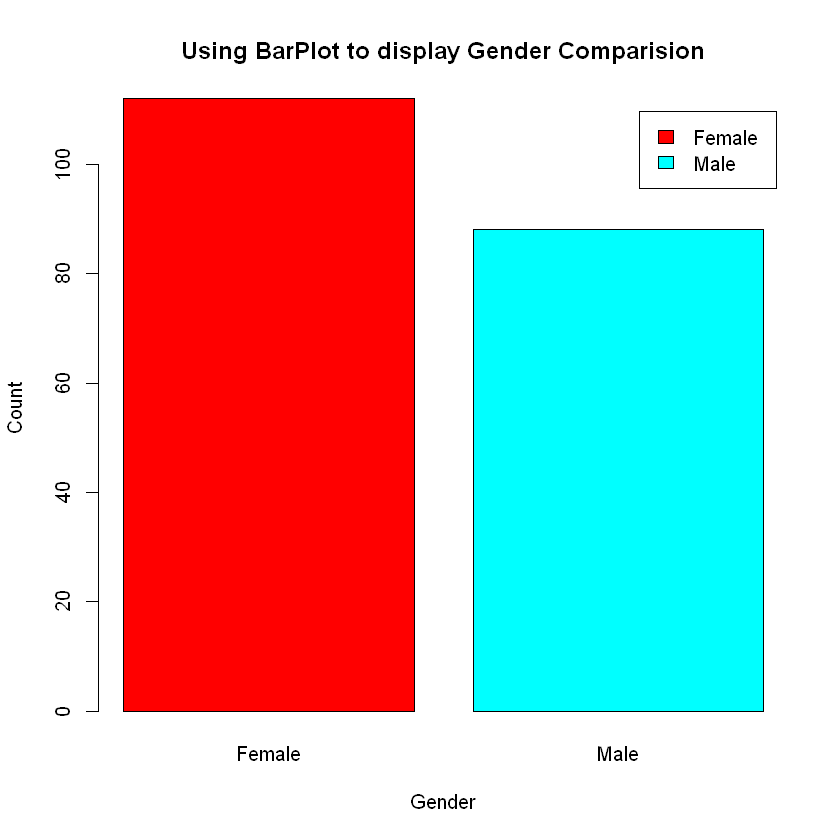

In [80]:
# Normal BarPlot to understand the gender Comparision

barplot(a,main="Using BarPlot to display Gender Comparision",
        ylab="Count",
        xlab="Gender",
        col=rainbow(2),
        legend=rownames(a))

In [81]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")

In [82]:
#install.package(plotrix)

In [83]:
library(plotrix)

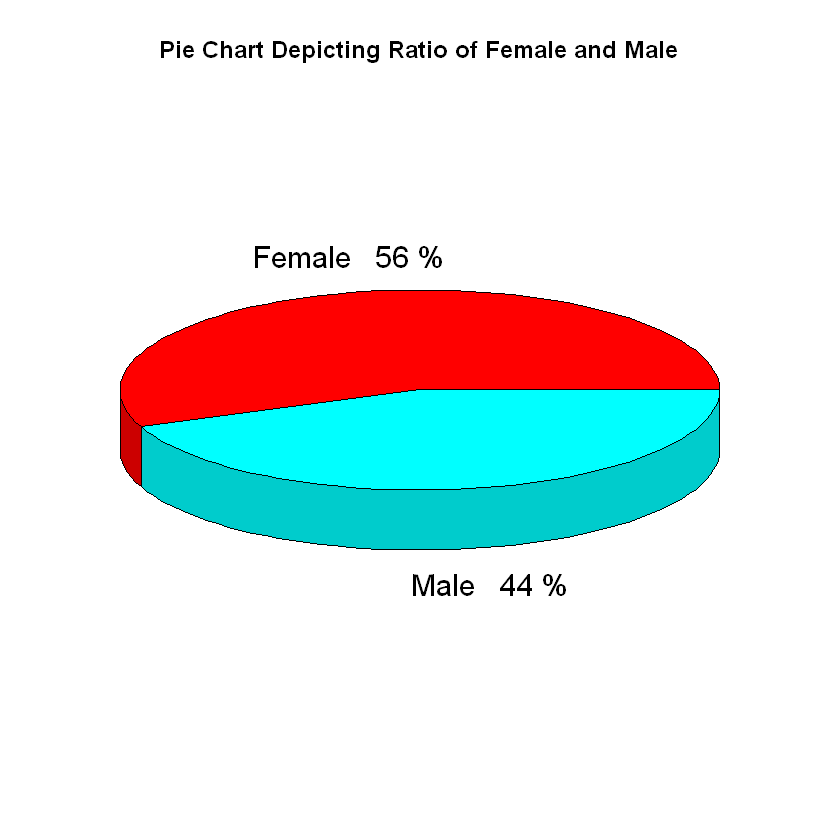

In [84]:
# 3D Pie Chart depicting Ratio of Female and Male

pie3D(a,labels=lbs,
      main="Pie Chart Depicting Ratio of Female and Male")


In [85]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

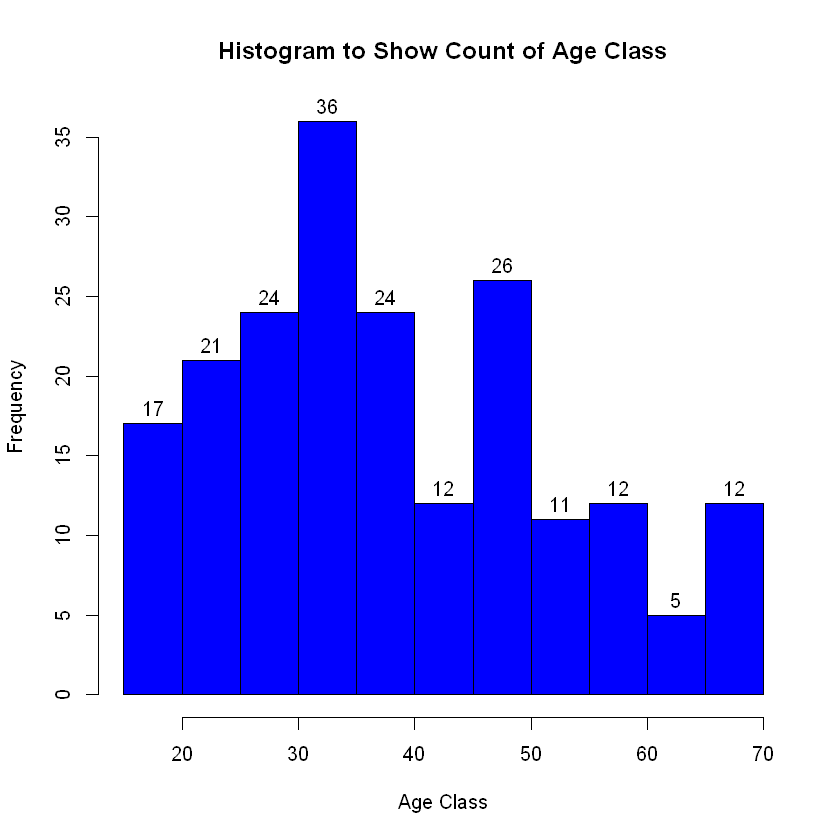

In [86]:
# Histogram to understand the Count of Age Class

hist(customer_data$Age,
     col="blue",
     main="Histogram to Show Count of Age Class",
     xlab="Age Class",
     ylab="Frequency",
     labels=TRUE)

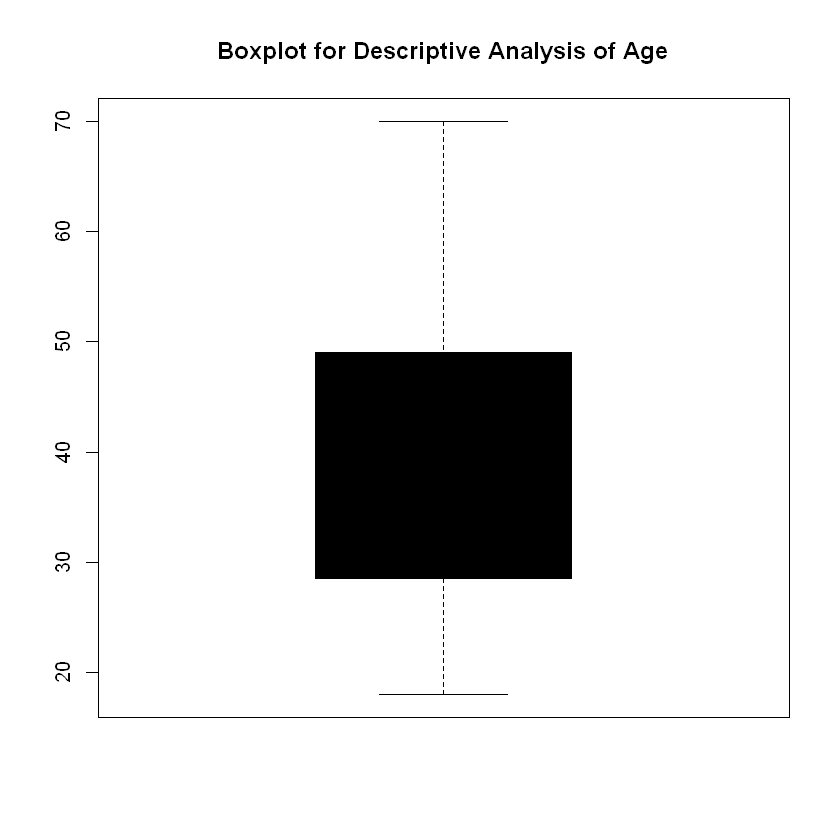

In [87]:
boxplot(customer_data$Age,
        col="black",
        main="Boxplot for Descriptive Analysis of Age")


In [88]:
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

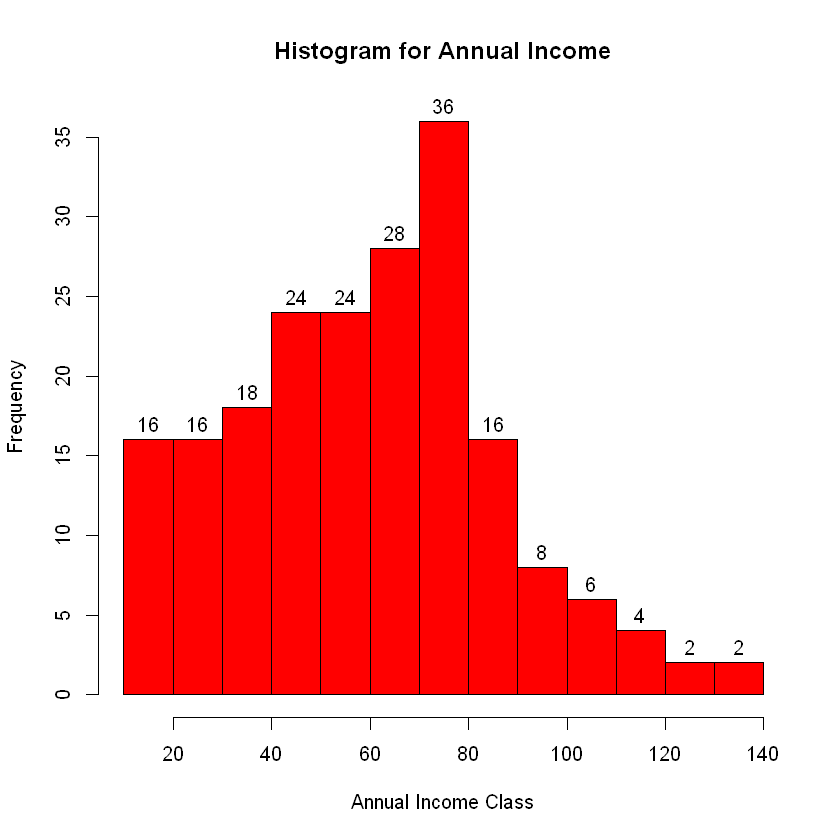

In [89]:
# Plotting a Histogram for Annual Income
hist(customer_data$Annual.Income..k..,
     col="red",
     main="Histogram for Annual Income",
     xlab="Annual Income Class",
     ylab="Frequency",
     labels=TRUE)

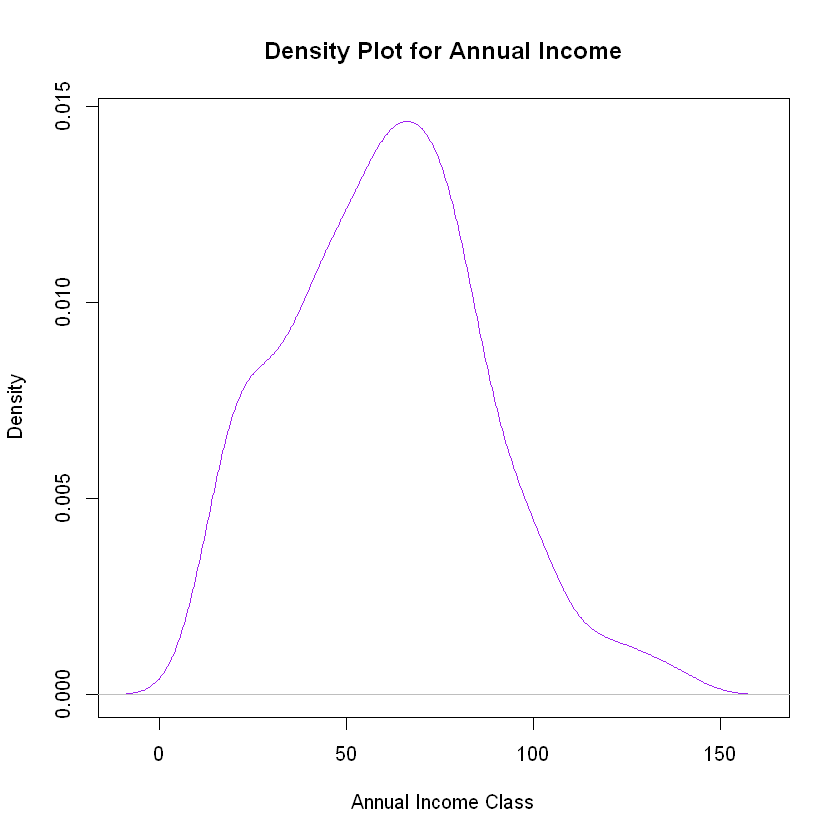

In [90]:
# Density Plot for Annual Income
plot(density(customer_data$Annual.Income..k..),
     col="purple",
     main="Density Plot for Annual Income",
     xlab="Annual Income Class",
     ylab="Density")

#### Density Plot to check for outliers if any in Annual Income.

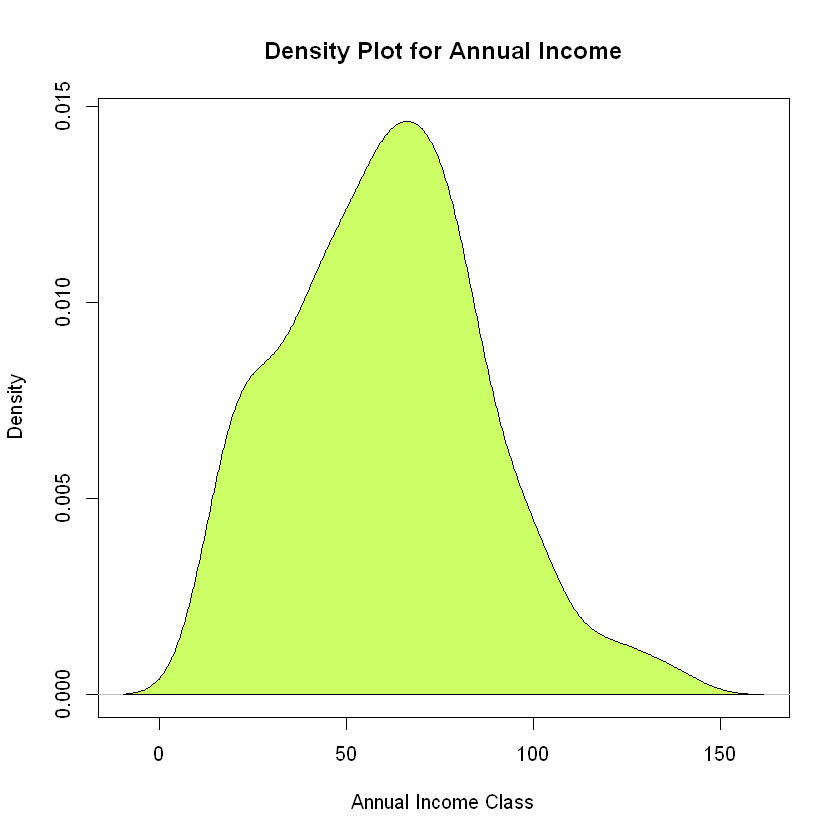

In [91]:
plot(density(customer_data$Annual.Income..k..),
     col="yellow",
     main="Density Plot for Annual Income",
     xlab="Annual Income Class",
     ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

#### From above we conclude that the minimum annual income of customers is 15 & the max is 137. 
#### People earning an average income of 70 have the highest frequency count in our histogram distribution.
#### In the Kernel Density Plot, we observe that annual income has a normal distribution.


#### Visualizing Spending scores of Customers:

In [92]:
summary(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

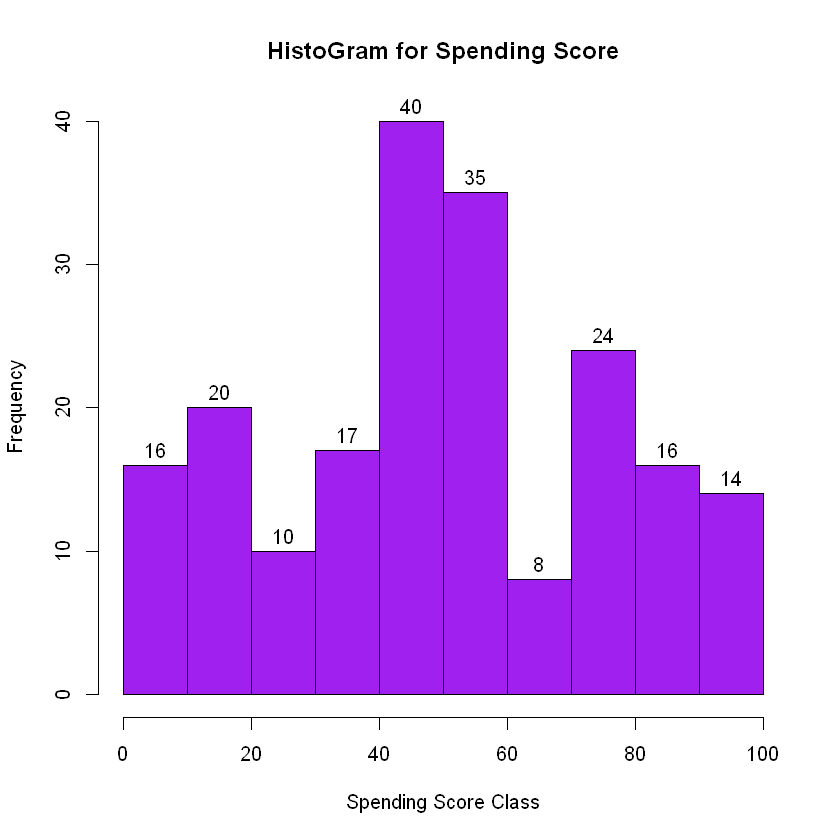

In [93]:
# Plotting Histogram to understand Spending Score
hist(customer_data$Spending.Score..1.100.,
     main="HistoGram for Spending Score",
     xlab="Spending Score Class",
     ylab="Frequency",
     col="purple",
     labels=TRUE)

#### Finding outliers if any

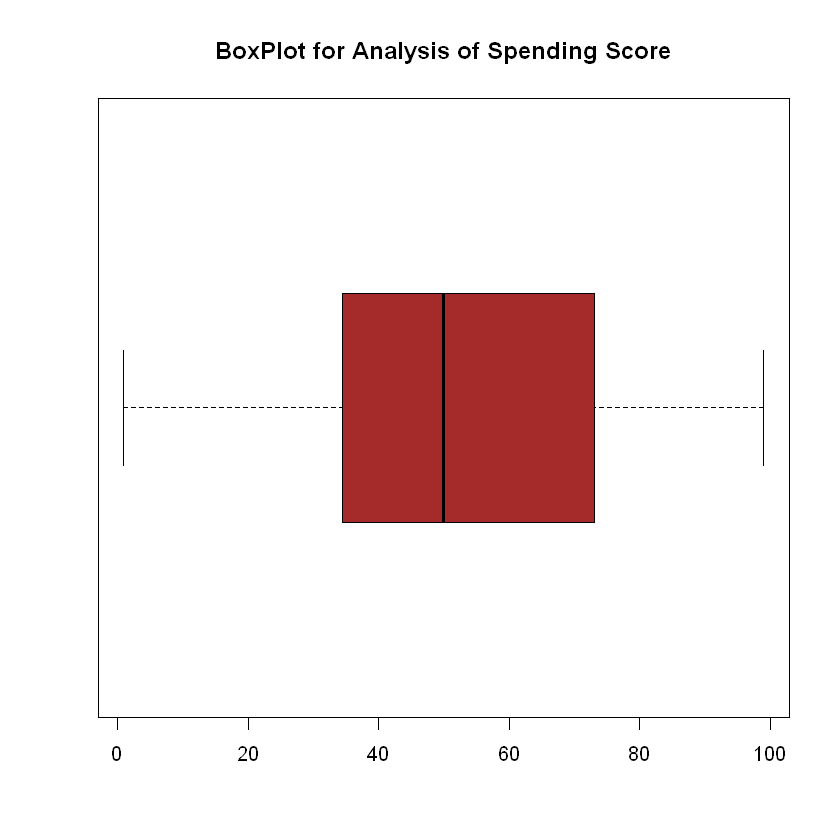

In [94]:
boxplot(customer_data$Spending.Score..1.100.,
        horizontal=TRUE,
        col="brown",
        main="BoxPlot for Analysis of Spending Score")

## K-Means Algorithm

In [95]:
customer_data=read.csv("D:/R Lab/Customer Segmentation/CustomerSegmentation-master/data/Mall_Customers.csv")

In [96]:
str(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [97]:
names(customer_data)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [98]:
library(purrr)

In [99]:
set.seed(123)

#### Function to calculate total intra-cluster sum of square

In [100]:
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

In [101]:
k.values <- 1:10
iss_values <- map_dbl(k.values, iss)

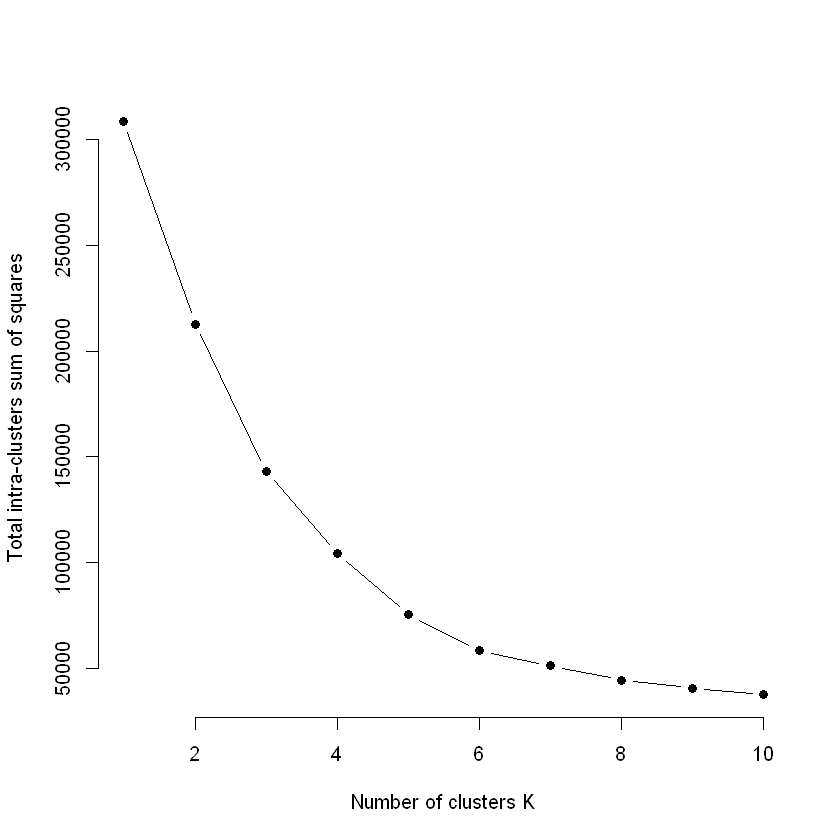

In [102]:
#Plot the graph to understand the patterns between No of Clusters and Total Intra-Clusters

plot(k.values, iss_values,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total intra-clusters sum of squares")

In [103]:
library(cluster) 
library(gridExtra)
library(grid)

### Run the algorithm n times

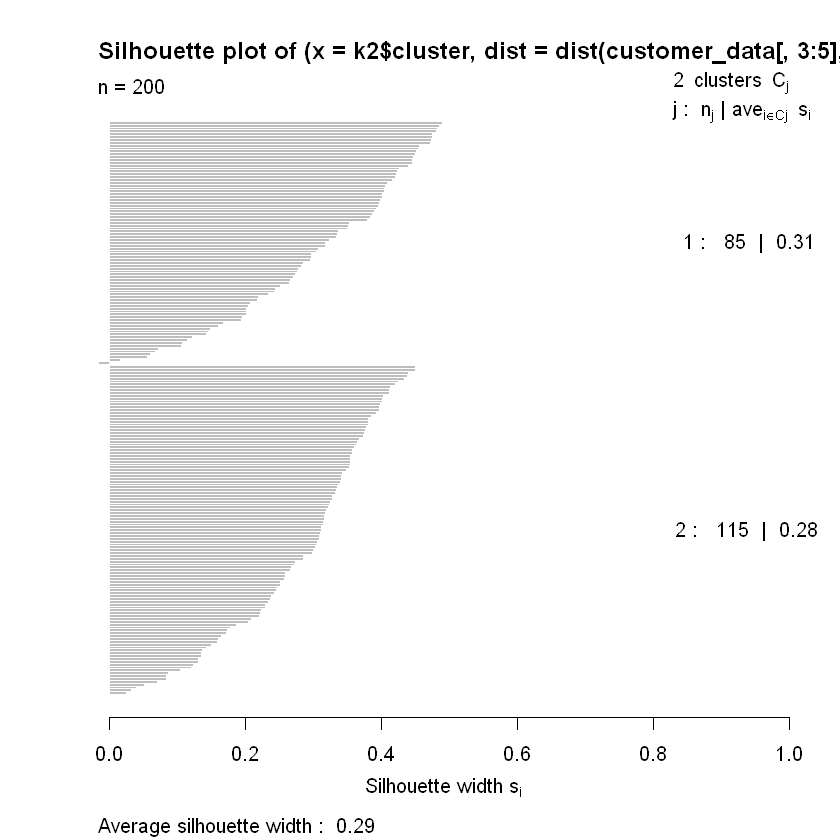

In [104]:
k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

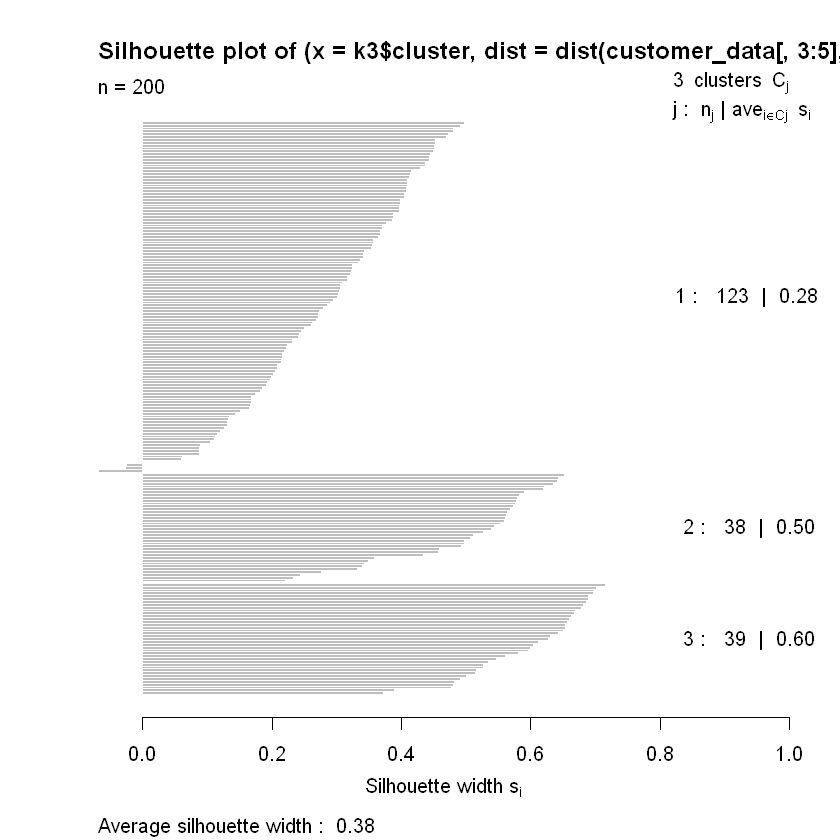

In [105]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

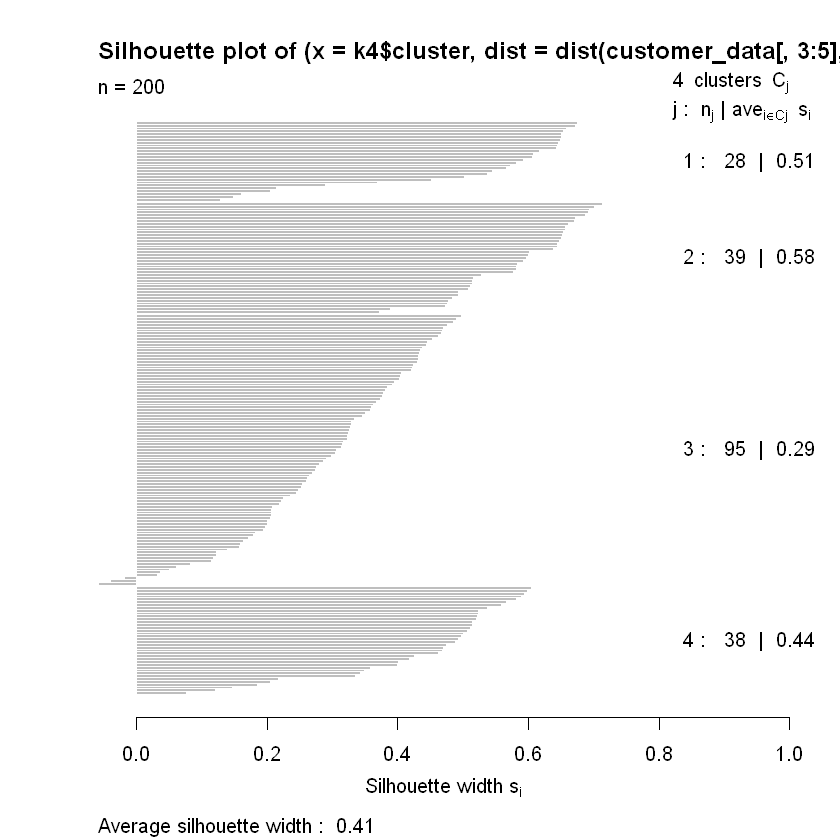

In [106]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

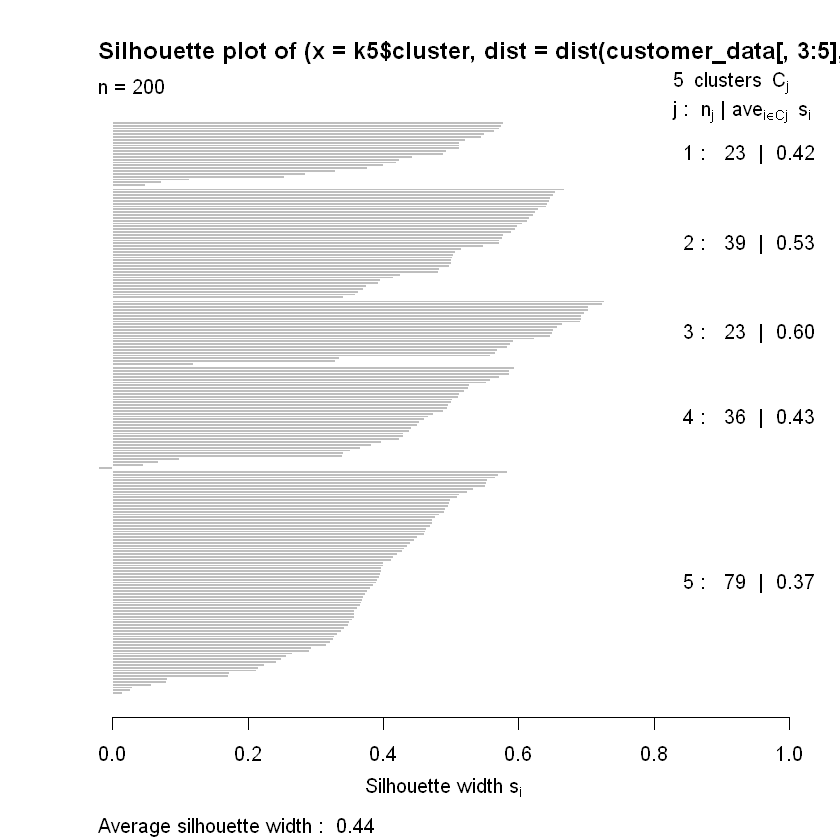

In [107]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

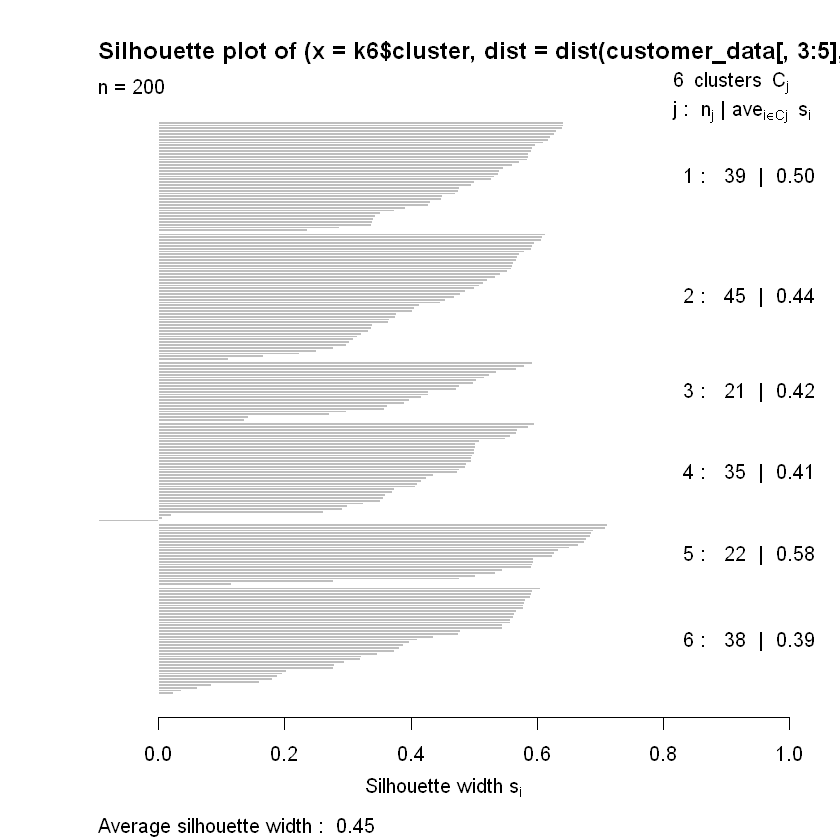

In [108]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

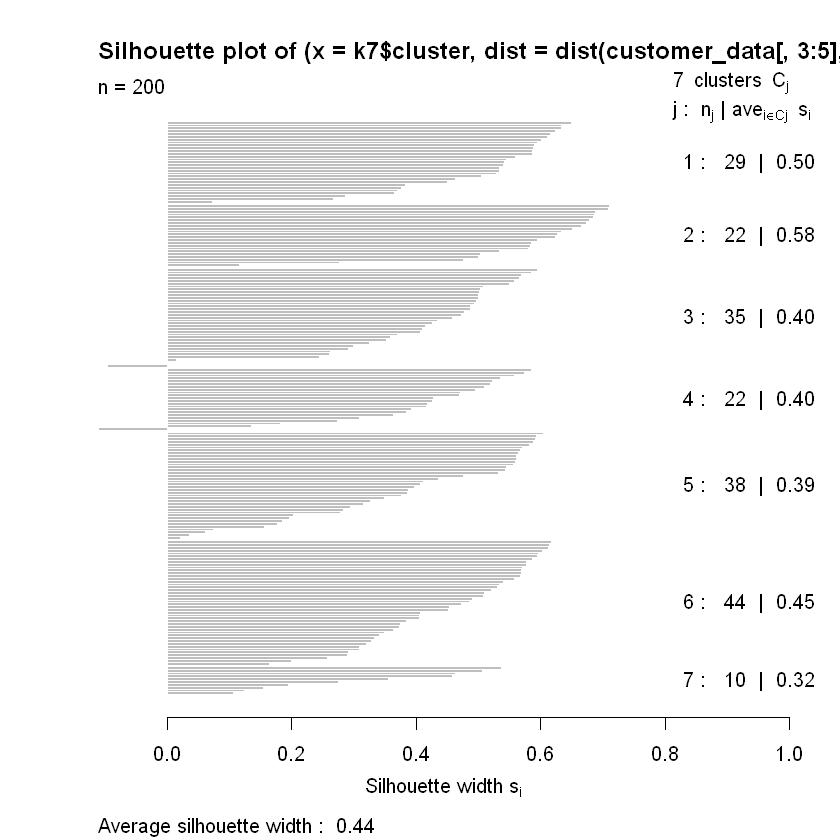

In [109]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

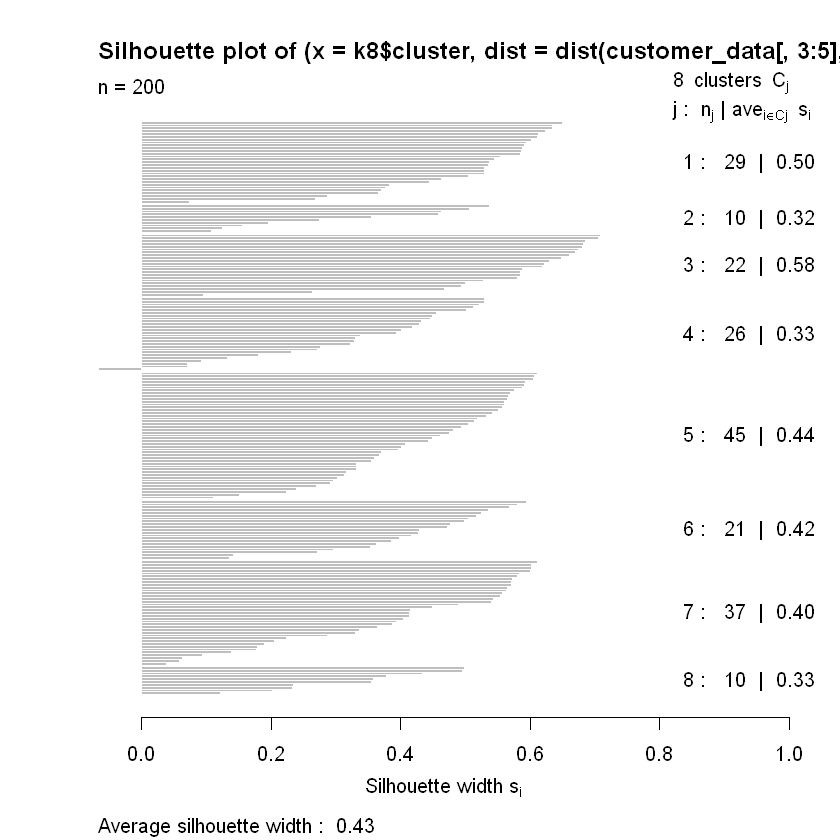

In [110]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

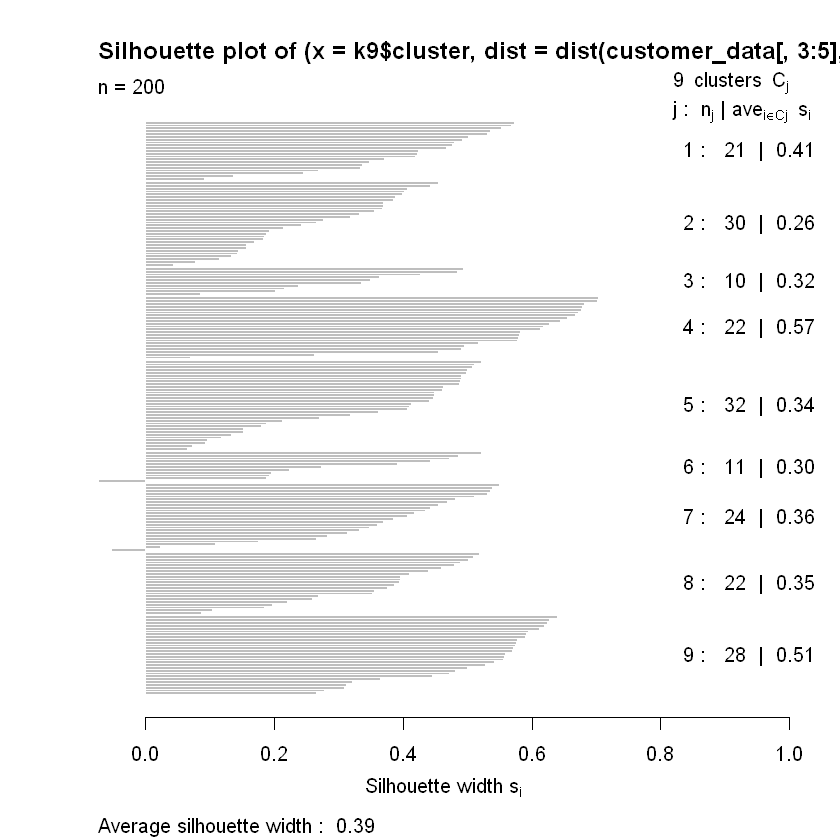

In [111]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

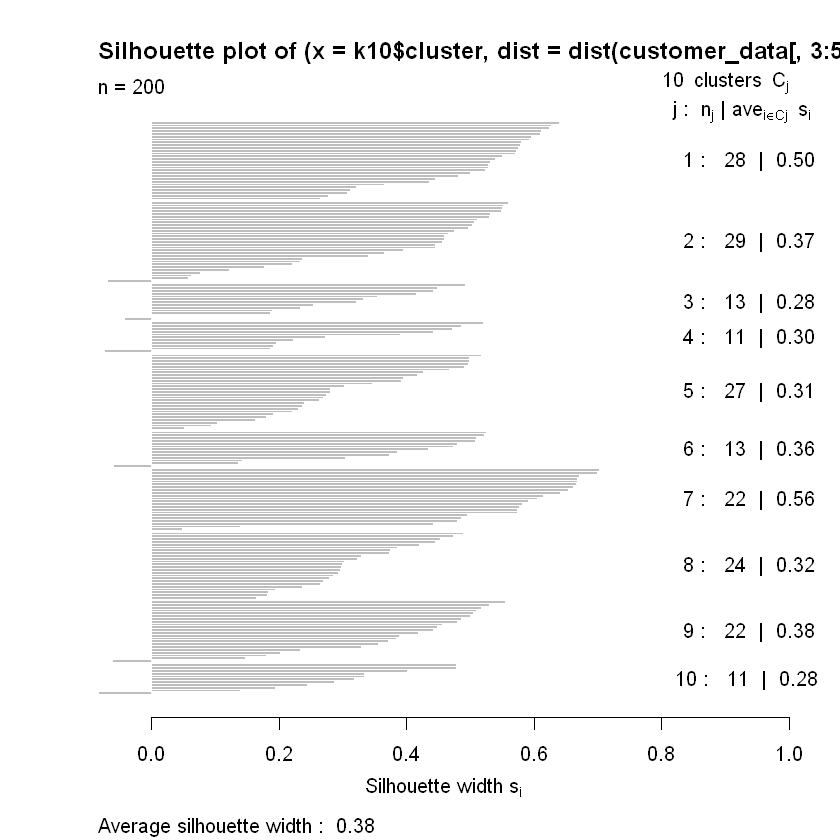

In [112]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

In [113]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [114]:
install.packages("foreign")

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'foreign' is not available (for R version 3.6.1)"

In [115]:
library(NbClust)
library(factoextra)


In [116]:
set.seed(125)

In [117]:
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)

In [118]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 35, 22, 38, 44, 22, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 41.68571           88.22857               17.28571
2 44.31818           25.77273               20.27273
3 27.00000           56.65789               49.13158
4 56.34091           53.70455               49.38636
5 25.27273           25.72727               79.36364
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 [38] 5 2 5 4 5 2 3 2 5 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 [75] 4 3 4 3 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 3 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
[112] 3 3 3 3 3 4 4 4 4 3 3 3 6 3 6 1 6 1 6 1 6 3 6 1 6 1 6 1 6 1 6 3 6 1 6 1 6
[149] 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1
[186] 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6

Within cluster sum of squares by cluster:
[1] 16690.857  8189.000  7742.895  7607.477  40

### Principal Component Analysis

In [119]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE)

In [120]:
summary(pcclust)

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

In [121]:
pcclust$rotation[,1:2]

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


In [122]:
set.seed(1)

#### Plotting the segmentation of Mall Customers using K-means Clustering using two graphs
#### 1) Annual Income against Spending Score


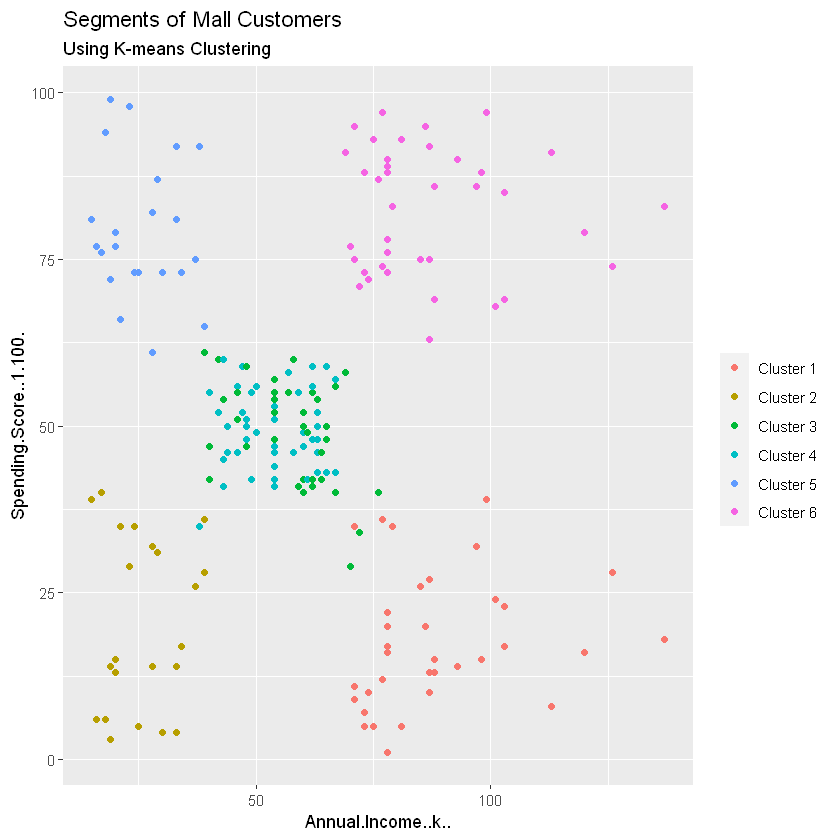

In [123]:
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")


#### 2) Spending Score against Age

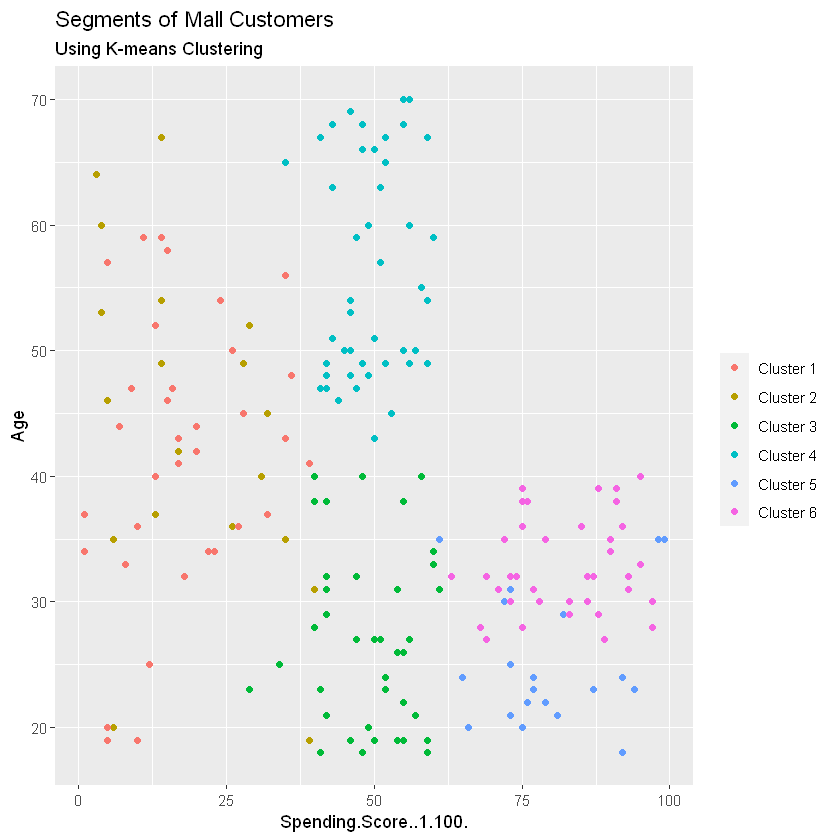

In [124]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

In [125]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
                    return (cols[as.numeric(as.factor(vec))])}

### K_Means Cluster

In [126]:
digCluster<-k6$cluster; dignm<-as.character(digCluster);

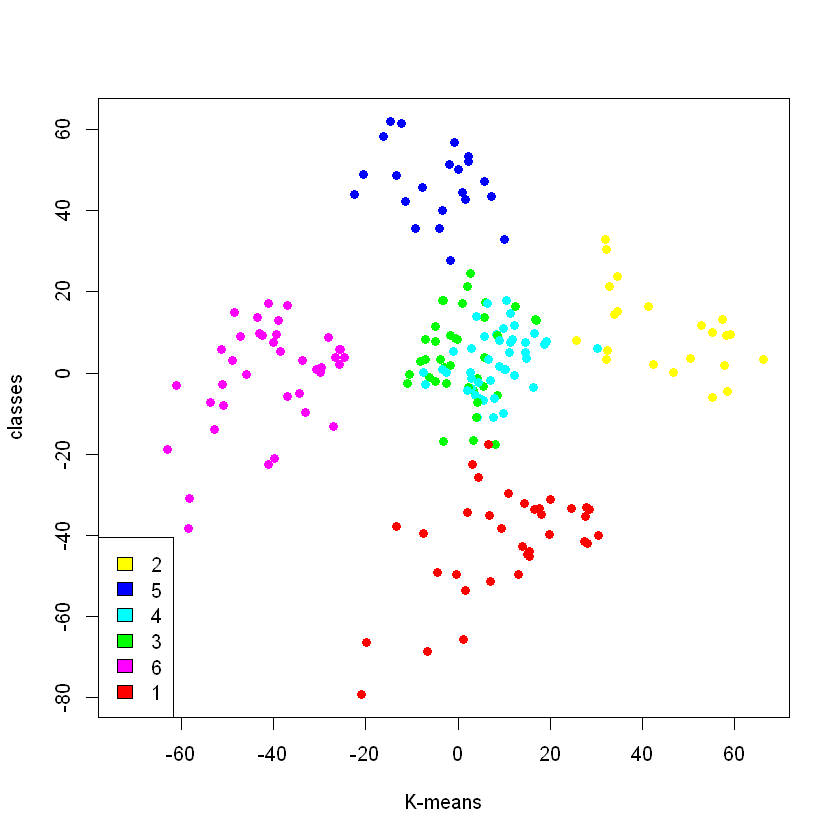

In [127]:
# Visualize Clusters in the data

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))

#### With the help of clustering, we can understand the variables much better, prompting us to 
#### take careful decisions. With the identification of customers, companies can release products
#### and services that target customers based on several parameters like income, age,spending patterns
#### etc. 
#### Furthermore, more complex patterns like product reviews are taken into consideration for
#### better segmentation.